<a href="https://colab.research.google.com/github/SergeyShchus/OSM/blob/main/Notebook/09_Building_footprint_(plus_street_network)_figure_ground_diagrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install osmnx

In [2]:
import osmnx as ox
from IPython.display import Image

%matplotlib inline
ox.__version__

'1.1.2'

In [3]:
# configure the inline image display
img_folder = "images"
extension = "png"
size = 240

# specify that we're retrieving building footprint geometries
tags = {"building": True}

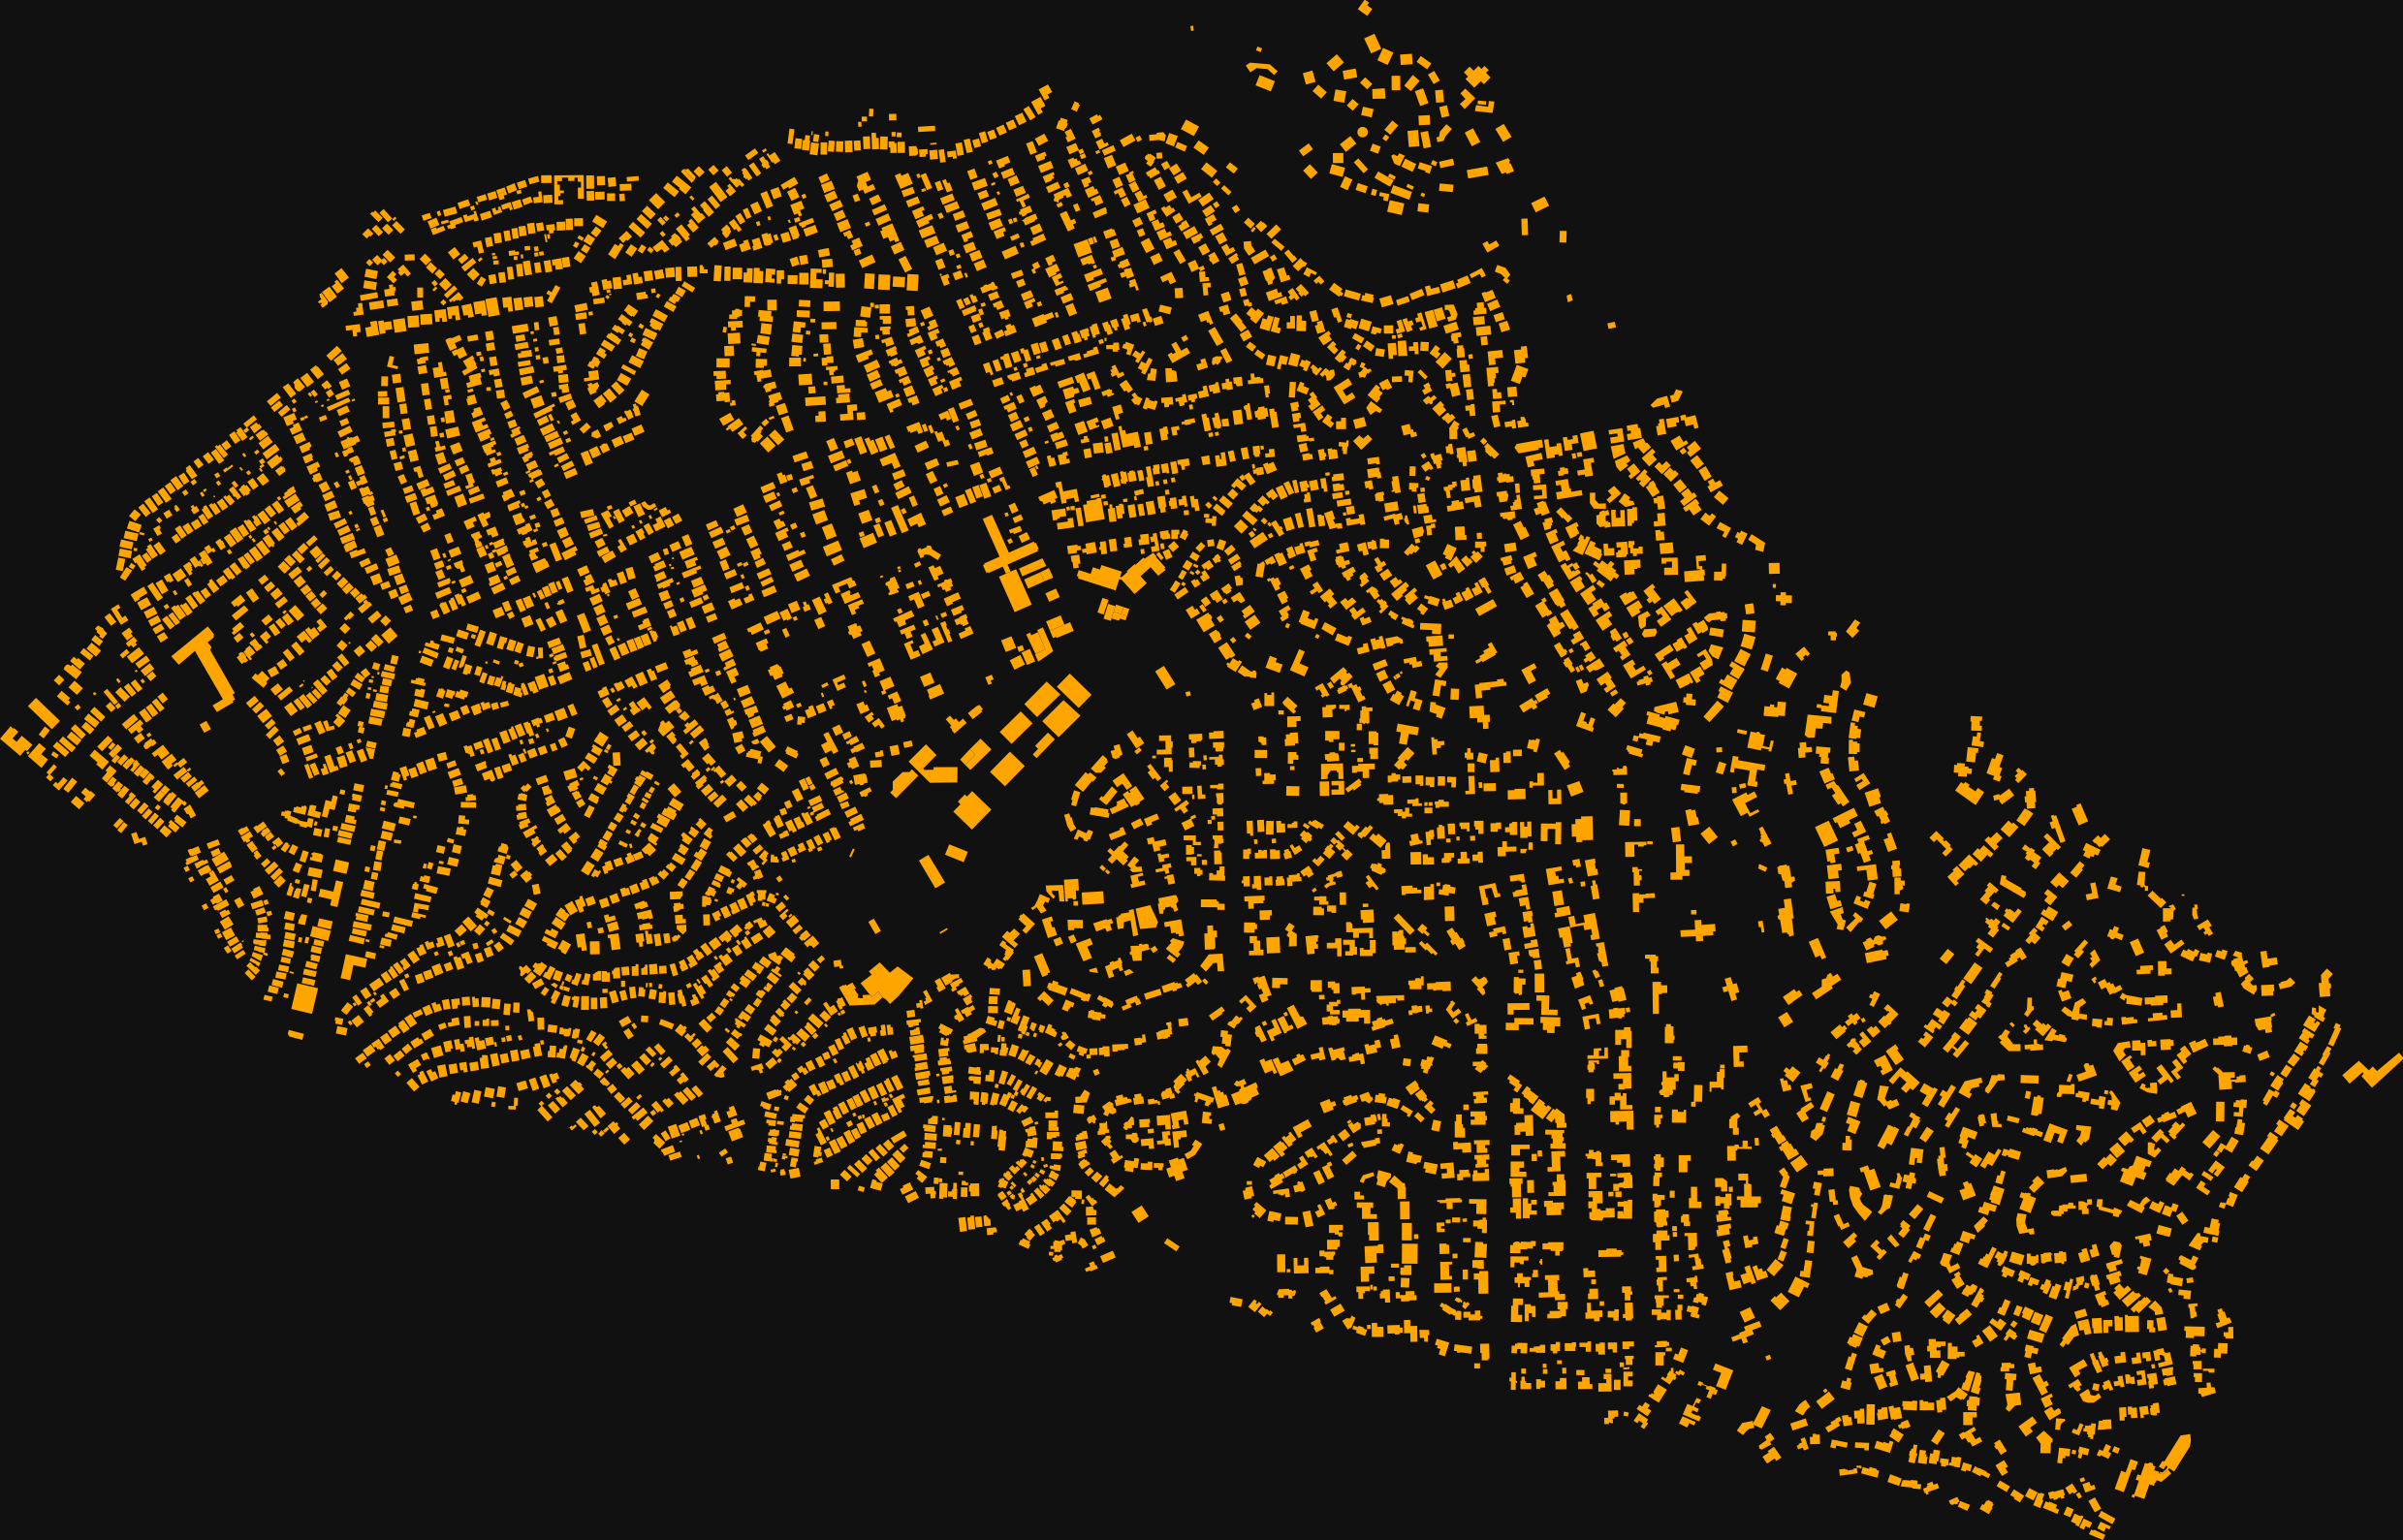

In [4]:
gdf = ox.geometries_from_place("Piedmont, California, USA", tags)
gdf_proj = ox.project_gdf(gdf)
fp = f"./{img_folder}/piedmont_bldgs.{extension}"
fig, ax = ox.plot_footprints(gdf_proj, filepath=fp, dpi=400, save=True, show=False, close=True)
Image(fp, height=size, width=size)

In [10]:
# save as a shapefile
data_folder = "data"

gdf_save = gdf.applymap(lambda x: str(x) if isinstance(x, list) else x)
gdf_save.drop(labels="nodes", axis=1).to_file("/content/sample_data/piedmont_bldgs.gpkg", driver="GPKG")

In [11]:
# calculate the area in projected units (meters) of each building footprint, then display first five
areas = gdf_proj.area
areas.head()

element_type  osmid     
node          3153686913       0.000000
way           28861558      1803.150024
              28861563       775.876377
              28861579      1592.614378
              28861587       705.441637
dtype: float64

In [12]:
# total area (sq m) covered by building footprints
sum(areas)

874697.9377605589

In [13]:
# get the total area within Piedmont's admin boundary in sq meters
place = ox.geocode_to_gdf("Piedmont, California, USA")
place_proj = ox.project_gdf(place)
place_proj.area.iloc[0]

4348556.941464366

In [14]:
# what proportion of piedmont is covered by building footprints?
sum(areas) / place_proj.area.iloc[0]

0.20114671361897965

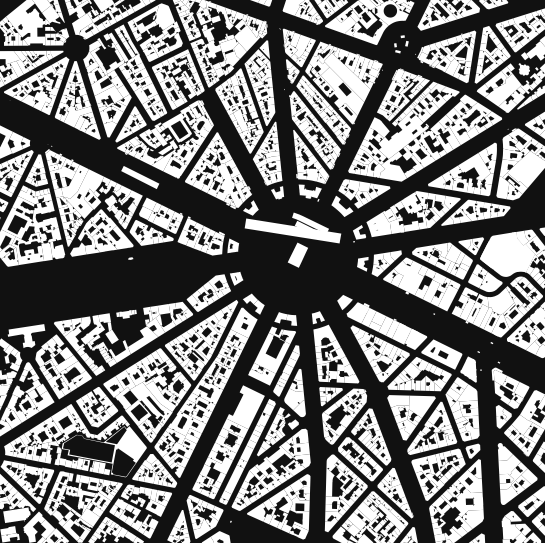

In [15]:
point = (48.873446, 2.294255)
dist = 612
gdf = ox.geometries_from_point(point, tags, dist=dist)
gdf_proj = ox.project_gdf(gdf)
bbox = ox.utils_geo.bbox_from_point(point=point, dist=dist, project_utm=True)
fp = f"./{img_folder}/paris_bldgs.{extension}"
fig, ax = ox.plot_footprints(
    gdf_proj,
    bbox=bbox,
    color="w",
    filepath=fp,
    dpi=90,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

## Street network + building footprints: square-mile visualizations

In [16]:
# helper funcion to get one-square-mile street networks, building footprints, and plot them
def make_plot(
    place,
    point,
    network_type="drive",
    dpi=40,
    dist=805,
    default_width=4,
    street_widths=None,
):
    fp = f"./{img_folder}/{place}.{extension}"
    gdf = ox.geometries_from_point(point, tags, dist=dist)
    fig, ax = ox.plot_figure_ground(
        point=point,
        dist=dist,
        network_type=network_type,
        default_width=default_width,
        street_widths=street_widths,
        save=False,
        show=False,
        close=True,
    )
    fig, ax = ox.plot_footprints(
        gdf, ax=ax, filepath=fp, dpi=dpi, save=True, show=False, close=True
    )

In [17]:
place = "portland_buildings"
point = (45.517309, -122.682138)
make_plot(place, point)

In [18]:
place = "richmond_district_buildings"
point = (37.781999, -122.472501)
make_plot(place, point)

In [19]:
place = "port_au_prince_buildings"
point = (18.522240, -72.347607)
make_plot(place, point, network_type="all", default_width=1, street_widths={"secondary": 3})

In [20]:

place = "monrovia_liberia_buildings"
point = (6.340236, -10.747255)
make_plot(place, point, network_type="all", default_width=2, street_widths={"primary": 6})